# DS-SF-34 | 05 | _k_-Nearest Neighbors | Codealong | Answer Key

In [1]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

from sklearn import preprocessing, neighbors, model_selection

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv(os.path.join('..', 'datasets', 'dataset-05-iris.csv'))

In [3]:
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


## Part A | Activity | Iris Dataset | Exploratory Data Analysis

In [4]:
color = df.Species.map({'Setosa': 'red', 'Versicolor': 'green', 'Virginica': 'blue'})

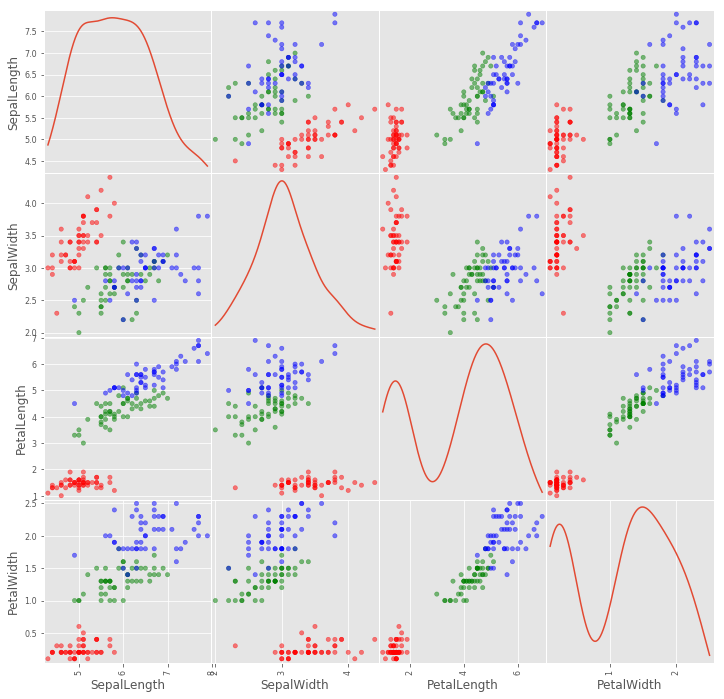

In [5]:
pd.tools.plotting.scatter_matrix(
    df[ ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'] ],
    diagonal = 'kde', s = 75, c = color, figsize = (12, 12)
)

## Part B | Activity | Hand-Coded Classifier

In [6]:
c = df.Species

In [7]:
def my_first_classifier(row):
    if row.PetalLength < 2.:
        return 'Setosa'
    elif row.PetalLength < 5.:
        return 'Versicolor'
    else:
        return 'Virginica'

In [8]:
c_hat = df.apply(my_first_classifier, axis = 1)

c_hat

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
dtype: object

In [9]:
(c_hat != c).sum()

8

8 instances have been incorrectly classified.  But which ones?

In [10]:
pd.crosstab(c_hat, c, rownames = ['Hypothesized Class'], colnames = ['True Class'])

True Class,Setosa,Versicolor,Virginica
Hypothesized Class,,,
Setosa,50,0,0
Versicolor,0,48,6
Virginica,0,2,44


6 instances predicted as `Versicolor` were in fact `Virginica`; 2 instances predicted as `Virginica` were in fact `Versicolor`.

## Part C | Classification Metrics

### Accuracy

In [11]:
(c_hat == c).mean()

0.94666666666666666

### Misclassification rate

In [12]:
(c_hat != c).mean()

0.053333333333333337

## Part D | _k_-Nearest Neighbors (_k_-NN)

### Feature matrix and response vector

- (http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [13]:
columns_X = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
X = df[columns_X]

scaler = preprocessing.MinMaxScaler().fit(X)

X = scaler.transform(X)

In [14]:
X

array([[ 0.22222222,  0.625     ,  0.06779661,  0.04166667],
       [ 0.16666667,  0.41666667,  0.06779661,  0.04166667],
       [ 0.11111111,  0.5       ,  0.05084746,  0.04166667],
       [ 0.08333333,  0.45833333,  0.08474576,  0.04166667],
       [ 0.19444444,  0.66666667,  0.06779661,  0.04166667],
       [ 0.30555556,  0.79166667,  0.11864407,  0.125     ],
       [ 0.08333333,  0.58333333,  0.06779661,  0.08333333],
       [ 0.19444444,  0.58333333,  0.08474576,  0.04166667],
       [ 0.02777778,  0.375     ,  0.06779661,  0.04166667],
       [ 0.16666667,  0.45833333,  0.08474576,  0.        ],
       [ 0.30555556,  0.70833333,  0.08474576,  0.04166667],
       [ 0.13888889,  0.58333333,  0.10169492,  0.04166667],
       [ 0.13888889,  0.41666667,  0.06779661,  0.        ],
       [ 0.        ,  0.41666667,  0.01694915,  0.        ],
       [ 0.41666667,  0.83333333,  0.03389831,  0.04166667],
       [ 0.38888889,  1.        ,  0.08474576,  0.125     ],
       [ 0.30555556,  0.

In [15]:
type(X)

numpy.ndarray

In [16]:
X.shape

(150L, 4L)

> ### `X` is no longer a `DataFrame` but stays as a tabular format in the form of a _numpy_ 2D array

In [17]:
pd.DataFrame(X, columns = columns_X).describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


> ### The normalization is done per column

In [18]:
c = df.Species

In [19]:
c

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: Species, dtype: object

### _k_-Nearest Neighbors

- (http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [20]:
model = neighbors.KNeighborsClassifier(n_neighbors = 1).\
    fit(X, c)

You can measure the precision of your prediction with `.score()`

In [21]:
model.score(X, c)

1.0

In [22]:
c_hat = model.predict(X)

In [23]:
(c_hat == c).mean()

1.0

In [24]:
pd.crosstab(c_hat, c, rownames = ['Hypothesized Class'], colnames = ['True Class'])

True Class,Setosa,Versicolor,Virginica
Hypothesized Class,,,
Setosa,50,0,0
Versicolor,0,50,0
Virginica,0,0,50


### Train/test sets

- (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html)

50% of the dataset to train the model; the rest to test the model

In [25]:
train_df = df.sample(frac = .5, random_state = 0).sort_index()

In [26]:
train_df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
2,4.7,3.2,1.3,0.2,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
10,5.4,3.7,1.5,0.2,Setosa
13,4.3,3.0,1.1,0.1,Setosa
...,...,...,...,...,...
137,6.4,3.1,5.5,1.8,Virginica
141,6.9,3.1,5.1,2.3,Virginica
144,6.7,3.3,5.7,2.5,Virginica
146,6.3,2.5,5.0,1.9,Virginica


In [27]:
test_df = df.drop(train_df.index)

### Feature matrix `train_X` and response vector `train_c`

In [28]:
train_X = train_df[columns_X]

scaler = preprocessing.MinMaxScaler().fit(train_X)
train_X = scaler.transform(train_X)

train_c = train_df.Species

### Feature matrix `test_X` and response vector `test_c`

- (http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
- (http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)

In [29]:
test_X = test_df[columns_X]

# Here, you reuse the scaler that was created for scaling the train set
# (You don't fit on a test set!)
test_X = scaler.transform(test_X)

test_c = test_df.Species

In [30]:
k_cv = 5 # 5-fold CV
k_nn = range(1, train_df.shape[0] * (k_cv - 1) / k_cv) # k-NN

gs = model_selection.GridSearchCV(
    estimator = neighbors.KNeighborsClassifier(),
    param_grid = {'n_neighbors': k_nn, 'weights': ['uniform', 'distance']},
    cv = model_selection.KFold(n_splits = k_cv, shuffle = True, random_state = 0)
)

gs.fit(train_X, train_c)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [31]:
gs.cv_results_

{'mean_fit_time': array([ 0.00999999,  0.00339994,  0.00380006,  0.00480003,  0.00259995,
         0.00360003,  0.00360003,  0.00300002,  0.00240006,  0.00240006,
         0.00240002,  0.00280004,  0.00259995,  0.0026    ,  0.00259995,
         0.00239997,  0.00279999,  0.00300002,  0.00300002,  0.00300002,
         0.00199995,  0.00280004,  0.00280004,  0.00300002,  0.0026    ,
         0.00259995,  0.00300002,  0.00279999,  0.00179987,  0.00179992,
         0.00239997,  0.00240006,  0.00239992,  0.00220008,  0.00160003,
         0.00179992,  0.00240002,  0.00219998,  0.00180001,  0.00240002,
         0.00159998,  0.00159993,  0.00179996,  0.002     ,  0.00180006,
         0.00140004,  0.00159998,  0.00140004,  0.00159993,  0.00200005,
         0.00119996,  0.00200005,  0.00139999,  0.00139995,  0.00100002,
         0.00099998,  0.00099998,  0.00119996,  0.00139999,  0.00139995,
         0.00140004,  0.00180001,  0.00159998,  0.002     ,  0.00160003,
         0.00180001,  0.002     , 

In [32]:
gs.cv_results_.keys()

['rank_test_score',
 'param_n_neighbors',
 'std_score_time',
 'split2_test_score',
 'mean_fit_time',
 'split3_train_score',
 'std_test_score',
 'params',
 'std_fit_time',
 'param_weights',
 'std_train_score',
 'split4_test_score',
 'split1_train_score',
 'split2_train_score',
 'split4_train_score',
 'mean_score_time',
 'split0_train_score',
 'mean_train_score',
 'split0_test_score',
 'mean_test_score',
 'split3_test_score',
 'split1_test_score']

In [33]:
gs.best_score_

0.95999999999999996

In [34]:
gs.best_params_

{'n_neighbors': 3, 'weights': 'uniform'}

In [35]:
gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [36]:
gs.score(train_X, train_c)

0.95999999999999996

In [37]:
gs.score(test_X, test_c)

0.98666666666666669

## Final model

In [38]:
X = df[columns_X]
scaler = preprocessing.MinMaxScaler().fit(X)
X = scaler.transform(X)

c = df.Species

model = neighbors.KNeighborsClassifier(n_neighbors = 4, weights = 'distance').\
    fit(train_X, train_c)

model.score(X, c)

0.97999999999999998